> **Automatic Ticket Assignment**

#### Problem Statement
In the IT sector, Incident management helps to avoid any impact to the business operation by resolving the problem on time. The main goal of the process is to provide a quick fix by assigning to the right group. Wrong assignments will make the process slow down. Around ~25% of Incidents are wrongly assigned to teams which compromises the quality of management. This makes the firm in need of an additional resource to manage these activities. To avoid these problems a powerful system is required to manage these activities of assigning the ticket to the right teams in a short span of time. This can help the firm to minimize the ticket resolving cycle time and ensure the quality of application.

####          Data set provided


**Columns:** Short Description, Description, Caller <br>
**Target Variable:** Assignment Group

#### Approach used to EDA and Preprocessing
1. **8500** Records of data were present in a data set with 4 columns
2. Dropped **Caller column** as it is not relevant
3. Null/NA values are present in Description and Long Description values
4. Filling the Null/NA of Short Descriptions with Descriptions and vice versa if both are null the row will be dropped
5. Null/NA values were not present in Target variable
6. **74 Unique** Assignment groups were present in data set 
7. **Count plot** was used to visualise the data with respect to the groups
8. **Group 0** has more number of Assignments having 3296 records
9. Data was **highly imbalanced.** Group 0 Group 8, Group 24, Group 9, Group 12, Group 19 and Group 2 has more assignments
10. Majority of Description and short Description were in **English language** few data were in other languages
11. Displaying the Maximum and Minimum number of words present in Description and Short Description
12. Minimum number of words present in the short Description was 1
13. Maximum number of words present in short Description was 41
14. Description and short description columns were converted to **lowercase**
15. **Data cleansing** were done by removing digits,special characters, words with digits, escape characters, junk characters and extra spaces present in Description and Short Description
16. Stop words were removed using **NLTK** and also customized un wanted words were removed
17. NLTK's **WordNet** lemmatizer was used to lemmatize the words for Descriptions and Short Description
18. Merging **unique** words available in short Description and Descriptions into a single column as a **Final Description** column
19. Removing duplicates in each row of **Final Description** column
20. Displaying the Most frequency and least frequency words in **Final Description** column
21. **Word Tokenization** done using NLTK libraries
22. Visualizing the most and least frequency words in Final Description column using **Freq_plot**
23. Using **TextBlob**, Bi-gram words were taken and the frequency of Bi-gram words were displayed
24. Visualizing the most and least frequency Bi-gram words using **Freq_plot**
25. **Document matrix** is created and displaying word occurrence with respect to Groups
26. Visualizing the word occurrence in Each group using **WordCloud**
27. Group with records less than 10 has been dropped 






####          Model Building and Deciding Model

1. ULM, Fasttext, naive_bayes, Neural Network, Bi-Directional LSTM were tested for these data among these **Fasttext** provide better results.
2. **Fasttext Model** has been considered for this Dataset

#### Improvisation to be done

1. Identify other language data using language detectors and decide either to process/drop the rows accordingly
2. Other Models like BERT can be tested for better accuracy
3. Over-sample/under-sample can be performed as the data is heavily unbalanced
4. Data cleansing can be accomplished even more precisely by removing frequently occuring words that are not required
5. Caller information available in the Description column can be also removed in order to increase the accuracy of the model
6. Drop the group which has records less than 100 can also resolve the unbalanced distribution in data


Installing basic libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
sns.set_style("darkgrid")

In [3]:
#Mounting the Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Importing data

In [4]:
from pandas import ExcelWriter
from pandas import ExcelFile

dataset= pd.read_excel('/content/drive/My Drive/input_data.xlsx', sheet_name='Sheet1')

print("Column headings:")
print(dataset.columns)

Column headings:
Index(['Short description', 'Description', 'Caller', 'Assignment group'], dtype='object')


In [5]:
# Making copy of data to work
df = dataset.copy()

Printing a few records

In [6]:
df.head()

,Short description,Description,Caller,Assignment group
0,login issue,-verified user details.(employee# & manager na...,spxjnwir pjlcoqds,GRP_0
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,hmjdrvpb komuaywn,GRP_0
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,eylqgodm ybqkwiam,GRP_0
3,unable to access hr_tool page,unable to access hr_tool page,xbkucsvz gcpydteq,GRP_0
4,skype error,skype error,owlgqjme qhcozdfx,GRP_0


The information of Caller is not relevent. Hence, dropping this column

In [7]:
df.drop('Caller', axis = 1, inplace = True)
df.head(1)

,Short description,Description,Assignment group
0,login issue,-verified user details.(employee# & manager na...,GRP_0


>>> Let's explore the data

Shape of the data


In [8]:
df.shape

(8500, 3)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8500 entries, 0 to 8499
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Short description  8492 non-null   object
 1   Description        8499 non-null   object
 2   Assignment group   8500 non-null   object
dtypes: object(3)
memory usage: 199.3+ KB


Checking for missing values

In [10]:
df[df.isna().any(axis = 1)]

,Short description,Description,Assignment group
2604,NaN,\r\n\r\nreceived from: ohdrnswl.rezuibdt@gmail...,GRP_34
3383,NaN,\r\n-connected to the user system using teamvi...,GRP_0
3906,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3910,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3915,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3921,NaN,-user unable tologin to vpn.\r\n-connected to...,GRP_0
3924,NaN,name:wvqgbdhm fwchqjor\nlanguage:\nbrowser:mic...,GRP_0
4341,NaN,\r\n\r\nreceived from: eqmuniov.ehxkcbgj@gmail...,GRP_0
4395,i am locked out of skype,NaN,GRP_0


>Where there is Short description missing we fill it with long description

>Where there is Description missing we fill it with short description.

>Where both short or long description is missing we will drop that record

In [11]:
list_index_sd = df[df['Short description'].isna() == True].index
list_index_sd
for i in list_index_sd:
  df.iloc[i]['Short description'] = df.iloc[i]['Description']

In [12]:
list_index_d = df[df['Description'].isna() == True].index
list_index_d
for i in list_index_d:
  df.iloc[i]['Description'] = df.iloc[i]['Short description']

In [13]:
df.isna().any()

Short description    False
Description          False
Assignment group     False
dtype: bool

Howmany total Number of Assignment groups ?

In [14]:
df['Assignment group'].nunique()
assignment_groups = df['Assignment group'].unique()
assignment_groups

array(['GRP_0', 'GRP_1', 'GRP_3', 'GRP_4', 'GRP_5', 'GRP_6', 'GRP_7',
       'GRP_8', 'GRP_9', 'GRP_10', 'GRP_11', 'GRP_12', 'GRP_13', 'GRP_14',
       'GRP_15', 'GRP_16', 'GRP_17', 'GRP_18', 'GRP_19', 'GRP_2',
       'GRP_20', 'GRP_21', 'GRP_22', 'GRP_23', 'GRP_24', 'GRP_25',
       'GRP_26', 'GRP_27', 'GRP_28', 'GRP_29', 'GRP_30', 'GRP_31',
       'GRP_33', 'GRP_34', 'GRP_35', 'GRP_36', 'GRP_37', 'GRP_38',
       'GRP_39', 'GRP_40', 'GRP_41', 'GRP_42', 'GRP_43', 'GRP_44',
       'GRP_45', 'GRP_46', 'GRP_47', 'GRP_48', 'GRP_49', 'GRP_50',
       'GRP_51', 'GRP_52', 'GRP_53', 'GRP_54', 'GRP_55', 'GRP_56',
       'GRP_57', 'GRP_58', 'GRP_59', 'GRP_60', 'GRP_61', 'GRP_32',
       'GRP_62', 'GRP_63', 'GRP_64', 'GRP_65', 'GRP_66', 'GRP_67',
       'GRP_68', 'GRP_69', 'GRP_70', 'GRP_71', 'GRP_72', 'GRP_73'],
      dtype=object)

Number of occurrence of each group

In [15]:
df['Assignment group'].value_counts().head(30)

GRP_0     3976
GRP_8      661
GRP_24     289
GRP_12     257
GRP_9      252
GRP_2      241
GRP_19     215
GRP_3      200
GRP_6      184
GRP_13     145
GRP_10     140
GRP_5      129
GRP_14     118
GRP_25     116
GRP_33     107
GRP_4      100
GRP_29      97
GRP_18      88
GRP_16      85
GRP_17      81
GRP_31      69
GRP_7       68
GRP_34      62
GRP_26      56
GRP_40      45
GRP_28      44
GRP_41      40
GRP_15      39
GRP_30      39
GRP_42      37
Name: Assignment group, dtype: int64

Visualize Number of Assignment Group 

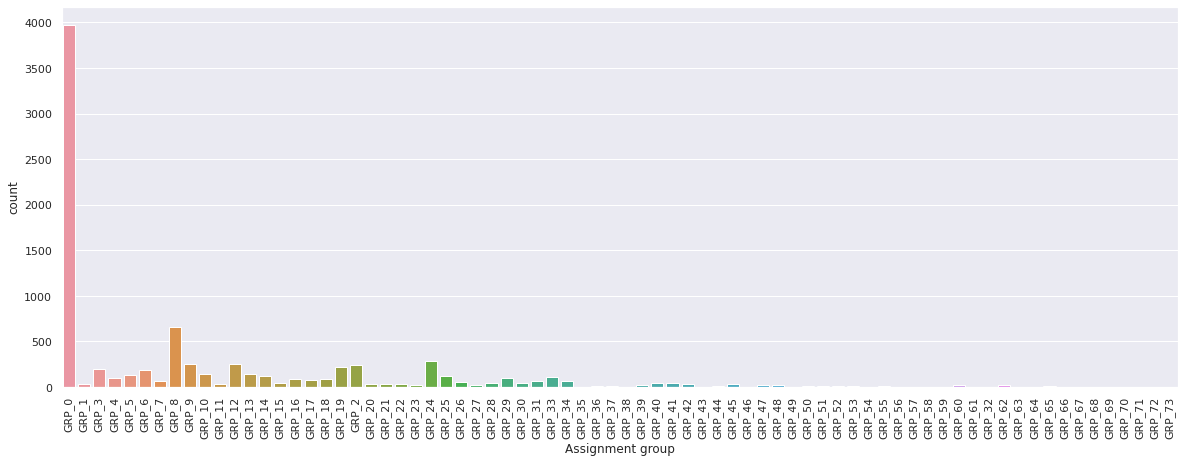

In [16]:
plt.figure(figsize = (20,7))
plt.xticks(rotation=90)
sns.countplot(df['Assignment group'])

>>**GRP_0 is assigned maximum number of times. GRP_8, GRP_24, GRP_9, GRP_12, GRP_19, GRP2** are among most assigned.

Exploring data

In [17]:
df.tail(50)

,Short description,Description,Assignment group
8450,unable to connect to wifi,unable to connect to wifi,GRP_0
8451,password reset erp SID_34,password reset erp SID_34,GRP_0
8452,r: finished: start of s&op process,\r\n\r\nreceived from: xfdkwusj.gyklresa@gmail...,GRP_0
8453,aw: SID_1 erp,\r\n\r\nreceived from: jofghyuach.nerreter@com...,GRP_0
8454,erp & business_client password blocked,"from: asfgthok topefd\nsent: friday, august 05...",GRP_0
8455,need teamviewer full version and visio applica...,need teamviewer full version and visio applica...,GRP_19
8456,calculation of the claim amount will make a mi...,from: uxndyfrs vahxnfgl [mailto:uxndyfrs.vahxn...,GRP_13
8457,æ— æ³•ç™»é™†hr_toolè€ƒå‹¤ç³»ç»Ÿ,æ˜¾ç¤ºjavaæ’ä»¶æ— æ³•åŠ è½½ï¼Œæ‰€éœ€ç‰ˆæœ¬1.8...,GRP_30
8458,windows account locked,windows account locked,GRP_0
8459,erp crm complaint when is assigned generating ...,when we update the complaint with assigned sta...,GRP_15


Take a look at few short description

In [18]:
for index,text in enumerate(df['Short description'][20:35]):
  print('\nShort Description %d:\n'%(index+1),text)


Short Description 1:
 unable to check payslips

Short Description 2:
 vpn issue

Short Description 3:
 unable to connect to vpn

Short Description 4:
 user called for vendor phone number

Short Description 5:
 vpn not working

Short Description 6:
 erp SID_37 password reset 

Short Description 7:
 unable to login to hr_tool to check payslips

Short Description 8:
 account locked out

Short Description 9:
 unable to login to hr_tool

Short Description 10:
 unable to log in to erp SID_34 

Short Description 11:
 password reset for collaboration_platform

Short Description 12:
 reset  users

Short Description 13:
 duplication of network address.

Short Description 14:
 ess password reset

Short Description 15:
 unable to install flash player


Take a look at few description

In [19]:
for index,text in enumerate(df['Description'][20:35]):
  print('\n Description %d:\n'%(index+1),text)


 Description 1:
 unable to check payslips

 Description 2:
 

received from: ugephfta.hrbqkvij@gmail.com

hello helpdesk

i am not able to connect vpn from home office. couple f hours ago i was connected, now it is not working anymore. getting a message that my session expired but if i click on the link, nothing happens.

[cid:image001.jpg@01d233aa.3f618be0]

*********************

need help with your dynamics crm?
click here<

chat with a live agent regarding your dynamics crm questions now! click here<

best 

 Description 3:
 unable to connect to vpn

 Description 4:
 user called for vendor phone number

 Description 5:
 

received from: dceoufyz.saufqkmd@gmail.com

hello,

i'm not being able to connect to company network through the vpn. pls check.

cc: sir-i am not being able to upload as a result of no company network.



 Description 6:
 erp SID_37 password reset 

 Description 7:
 unable to login to hr_tool to check payslips

 Description 8:
 account locked out

 Description 9

Determine the languages used in the dataset

In [20]:
# nwords_short_description --> Column defining number of words in 'Short description'
df['nwords_short_description'] = df['Short description'].apply(lambda x: len(str(x).split(" ")))

In [21]:
df[['Short description', 'nwords_short_description']].sort_values(by = 'nwords_short_description', ascending = False).head(5)

,Short description,nwords_short_description
4385,pc set up for new employee -mghlisha.baranwfhr...,41
1076,hello on my order below. i have 5 drop s...,32
2881,"i did a po and it received with no problem, i ...",28
3907,i am not able to log into my vpn. when i am tr...,28
6307,i have created 2 new material numbers but when...,27


In [22]:
# top five description with least number of words
df[["Short description","nwords_short_description"]].sort_values(by = "nwords_short_description",ascending = True).head()

,Short description,nwords_short_description
7682,discounts,1
4821,chg0034110,1
6227,vvdortddp,1
2833,hsh,1
7588,æ˜¾ç¤ºå™¨ä¸äº®,1


In [23]:
# nwords_description --> Column defining number of words in 'Description'
df['nwords_description'] = df['Description'].apply(lambda x: len(str(x).split(" ")))

What are top 5 Description with maximum number of words


In [24]:
df[['Description', 'nwords_description']].sort_values(by = 'nwords_description', ascending = False).head(5)

,Description,nwords_description
7345,we are seeing activity indicating the host at ...,1417
4087,"source ip : 172.20.10.37 , 208.211.136.158\nsy...",1398
4089,"source ip : 172.20.10.37 , 208.211.136.158\nsy...",1397
7989,source ip : 61.01.52.02617\r\nsystem name : lp...,1346
7995,source ip : 61.01.52.02617\r\nsystem name : lp...,1346


 What are top 5 Description with least number of words

In [25]:
df[['Description', 'nwords_description']].sort_values(by = 'nwords_description', ascending = True).head(5)

,Description,nwords_description
2788,the,1
3137,é‚®ç®±æ— æ³•å¯åŠ¨ï¼Œæç¤ºæ— æ³•åˆ›æ–°æ–°çš„å...,1
5708,the,1
3120,ç”µè„‘ç¡¬ç›˜æ•…éšœï¼Œè¯·æ±‚ç»´ä¿®ã€‚,1
8168,the,1


>>>Preprocessing the data 

Make 'Short description' and 'Description' into lower case

In [26]:
df["Short description"] = df["Short description"].astype(str).apply(lambda x: x.lower())
df["Short description"].head()

0                      login issue
1                          outlook
2               cant log in to vpn
3    unable to access hr_tool page
4                     skype error 
Name: Short description, dtype: object

In [27]:
df["Description"] = df["Description"].astype(str).apply(lambda x: x.lower())
df["Description"].head()

0    -verified user details.(employee# & manager na...
1    \r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...
2    \r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...
3                        unable to access hr_tool page
4                                         skype error 
Name: Description, dtype: object

In [28]:
df.head()

,Short description,Description,Assignment group,nwords_short_description,nwords_description
0,login issue,-verified user details.(employee# & manager na...,GRP_0,2,29
1,outlook,\r\n\r\nreceived from: hmjdrvpb.komuaywn@gmail...,GRP_0,1,23
2,cant log in to vpn,\r\n\r\nreceived from: eylqgodm.ybqkwiam@gmail...,GRP_0,5,9
3,unable to access hr_tool page,unable to access hr_tool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


Work in IT use naming conventions where special characters .,_:)(@; are widely used. Replacing them with a space 

In [29]:
df["Short description"] = df["Short description"].str.replace("[^.,_:)(@;\w\s]"," ")
df["Description"] = df["Description"].str.replace("[^.,_:)(@;\w\s]"," ")

Removing other punctuations

In [30]:
import re
import string
df['Short description'] = df['Short description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))
df['Description'] = df['Description'].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

In [31]:
df.tail(20)

,Short description,Description,Assignment group,nwords_short_description,nwords_description
8480,customer group enhanced field,\r\n\r\nreceived from nlearzwi ukdzstwi gmail...,GRP_9,4,76
8481,ess portal,\n\nreceived from eagvusbr nguqityl gmail com...,GRP_9,2,48
8482,robot hostname 776 is inactive,robot hostname 776 is inactive,GRP_8,4,4
8483,fw case id ref case 111121032 ref others,from pacvbetl yptglhoe \r\nsent thursday au...,GRP_0,6,86
8484,please remove user hugcadrn ixhlwdgt ralfteim...,please remove user hugcadrn ixhlwdgt ralfteim...,GRP_2,10,15
8485,ticket update on inc1538505 to user hbmwlprq i...,ticket update on inc1538505 to user hbmwlprq i...,GRP_0,8,8
8486,ticket update on ticket no0427635,ticket update on ticket no0427635,GRP_0,4,4
8487,telephony software is missing from pc,pc received multiple windows security updates ...,GRP_3,5,128
8488,erp account unlock,name mfeyouli ndobtzpw\nlanguage \nbrowser mic...,GRP_0,3,13
8489,account locked,account locked,GRP_0,2,2


Remove digits and word containing digits


In [32]:
df['Short description'] = df['Short description'].apply(lambda x: re.sub('\w*\d\w*','', x))
df['Description'] = df['Description'].apply(lambda x: re.sub('\w*\d\w*','', x))


Remove escape characters


In [33]:
regex = re.compile(r'[\n\r\t\'\b\\]')
df['Short description'] = df['Short description'].apply(lambda x: regex.sub(" ",x))
df['Description'] = df['Description'].apply(lambda x: regex.sub(" ",x))

Remove bad characters like 'å è ºï¼œæ ä šç µè å¼ æœºå¼ ä å ºæ'

In [34]:
#removing bad characters like å è ºï¼œæ ä šç µè å¼ æœºå¼ ä å ºæ
regex = re.compile(r'[^a-zA-z0-9 ]')
df['Description'] = df['Description'].apply(lambda x: regex.sub(" ",x))
df['Short description'] = df['Short description'].apply(lambda x: regex.sub(" ",x))


Removing extra spaces


In [35]:
df['Short description'] = df['Short description'].apply(lambda x: re.sub(' +',' ',x))
df['Description'] = df['Description'].apply(lambda x: re.sub(' +',' ',x))


Remove Stop words


In [36]:
## Importing stop words from nltk.corpus
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [37]:
stop = stopwords.words("english")

Upating stop words list as words like gmail, com are too common.

In [38]:
newStopWords = ['received','from','ticket','com','gmail','hi','hey','thanks','regards','hello','you']
stop.extend(newStopWords)

In [39]:
df["Short description"] = df["Short description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df["Description"] = df["Description"].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [40]:
  df.head()

,Short description,Description,Assignment group,nwords_short_description,nwords_description
0,login issue,verified user details employee manager name ch...,GRP_0,2,29
1,outlook,hmjdrvpb komuaywn team meetings skype meetings...,GRP_0,1,23
2,cant log vpn,eylqgodm ybqkwiam cannot log vpn best,GRP_0,5,9
3,unable access hr tool page,unable access hr tool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


Lemmatization


In [41]:
from nltk.stem import WordNetLemmatizer
from textblob import Word
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [42]:
lemmatizer = WordNetLemmatizer()

In [43]:
df["Short description"] = df["Short description"].apply(lambda x: " ".join([lemmatizer.lemmatize(Word(myword)) for myword in x.split()]))
df["Description"] = df["Description"].apply(lambda x: " ".join([lemmatizer.lemmatize(Word(myword)) for myword in x.split()]))

In [44]:
df.head()

,Short description,Description,Assignment group,nwords_short_description,nwords_description
0,login issue,verified user detail employee manager name che...,GRP_0,2,29
1,outlook,hmjdrvpb komuaywn team meeting skype meeting e...,GRP_0,1,23
2,cant log vpn,eylqgodm ybqkwiam cannot log vpn best,GRP_0,5,9
3,unable access hr tool page,unable access hr tool page,GRP_0,5,5
4,skype error,skype error,GRP_0,3,3


Creating clean dataframe with merging 'Short description' and 'Description' and taking only unique words from them


In [45]:
df['temp'] = df['Short description']+" "+df['Description']

In [46]:
df['temp'].head()

0    login issue verified user detail employee mana...
1    outlook hmjdrvpb komuaywn team meeting skype m...
2    cant log vpn eylqgodm ybqkwiam cannot log vpn ...
3    unable access hr tool page unable access hr to...
4                              skype error skype error
Name: temp, dtype: object

In [47]:
from collections import Counter 
  
def remov_duplicates(input): 
  
    # split input string separated by space 
    input = input.split(" ") 
  
    # joins two adjacent elements in iterable way 
    for i in range(0, len(input)): 
        input[i] = "".join(input[i]) 
  
    # now create dictionary using counter method 
    # which will have strings as key and their  
    # frequencies as value 
    UniqW = Counter(input) 
  
    # joins two adjacent elements in iterable way 
    s = " ".join(UniqW.keys()) 
    return s

In [48]:
df['final_description'] = df['temp'].apply(lambda x: remov_duplicates(x))

In [49]:
df.drop('temp', axis = 1, inplace = True)

In [50]:
df.head()

,Short description,Description,Assignment group,nwords_short_description,nwords_description,final_description
0,login issue,verified user detail employee manager name che...,GRP_0,2,29,login issue verified user detail employee mana...
1,outlook,hmjdrvpb komuaywn team meeting skype meeting e...,GRP_0,1,23,outlook hmjdrvpb komuaywn team meeting skype e...
2,cant log vpn,eylqgodm ybqkwiam cannot log vpn best,GRP_0,5,9,cant log vpn eylqgodm ybqkwiam cannot best
3,unable access hr tool page,unable access hr tool page,GRP_0,5,5,unable access hr tool page
4,skype error,skype error,GRP_0,3,3,skype error


In [51]:
df['final_description'].tail()

8495    email coming zz mail avglmrts vhqmtiua good af...
8496                             telephony software issue
8497              window password reset tifpdchb pedxruyf
8498    machine n est funcionando unable access utilit...
8499    mehreren pc lassen sich verschiedene prgramdnt...
Name: final_description, dtype: object

>>>EDA

In [52]:
### Most frequent words in short description
most_freq_words = pd.Series(" ".join(df["final_description"]).split()).value_counts()
most_freq_words.head(20)

tool          1893
company       1841
please        1717
erp           1082
password      1056
job           1028
monitoring     983
scheduler      969
issue          969
failed         880
unable         879
reset          862
user           818
email          747
sid            734
access         699
error          690
account        680
need           659
working        615
dtype: int64

In [53]:
### Least frequent words in short description
least_freq_words =  pd.Series(" ".join(df["final_description"]).split()).value_counts().sort_values(ascending = True)
least_freq_words.head(10)

fallowing           1
hajghtdul           1
bachsdadgtadw       1
quarant             1
promotion           1
vvamirsdwnp         1
vvspecmfrt          1
thry                1
gzawrocy            1
investmentantrag    1
dtype: int64

In [54]:
# Tokenize
from nltk import word_tokenize,sent_tokenize

In [55]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [56]:
df["final_description"].apply(lambda x: word_tokenize(x))

0       [login, issue, verified, user, detail, employe...
1       [outlook, hmjdrvpb, komuaywn, team, meeting, s...
2       [cant, log, vpn, eylqgodm, ybqkwiam, can, not,...
3                        [unable, access, hr, tool, page]
4                                          [skype, error]
                              ...                        
8495    [email, coming, zz, mail, avglmrts, vhqmtiua, ...
8496                         [telephony, software, issue]
8497        [window, password, reset, tifpdchb, pedxruyf]
8498    [machine, n, est, funcionando, unable, access,...
8499    [mehreren, pc, lassen, sich, verschiedene, prg...
Name: final_description, Length: 8500, dtype: object

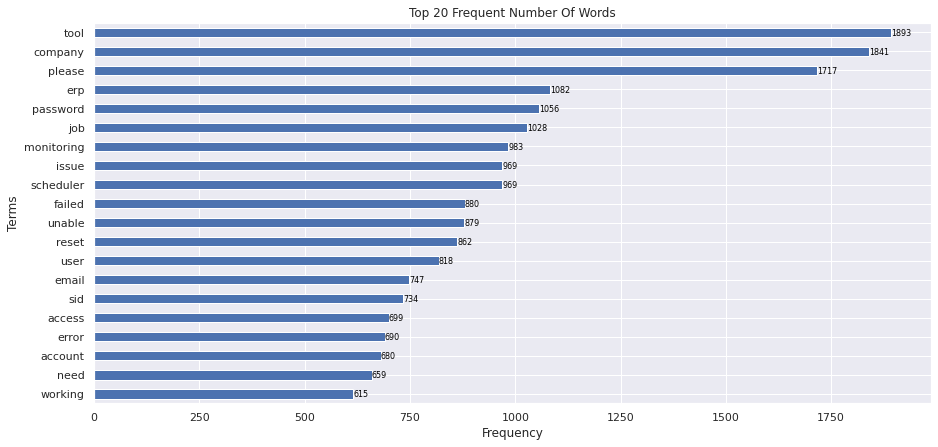

In [57]:
### Analyzing top 20 frequent words

plt.figure(figsize = (15,7))
sd_freq_plot = most_freq_words.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Number Of Words")

plt.style.use("ggplot")
sd_freq_plot.set_xlabel("Frequency")
sd_freq_plot.set_ylabel("Terms")

totals = []
for i in sd_freq_plot.patches:
    totals.append(i.get_width())

for i in sd_freq_plot.patches:
    sd_freq_plot.text(i.get_width()+.3,i.get_y()+0.1,str(i.get_width()),fontsize = 8,color= 'black')
    

Bigrams

In [58]:
pip install TextBlob

In [59]:
# creating bigrams
from textblob import TextBlob
bigrams = TextBlob(" ".join(df["final_description"])).ngrams(2)

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
word_vectorizer = CountVectorizer(ngram_range=(2,2), analyzer='word')
sparse_matrix = word_vectorizer.fit_transform(df["final_description"])
frequencies = sum(sparse_matrix).toarray()[0]
bi_grams_df = pd.DataFrame(frequencies, index=word_vectorizer.get_feature_names(), columns=['frequency'])

In [61]:
bi_grams_df.sort_values(by = "frequency",ascending=False).head(20)

,frequency
monitoring tool,919
tool company,909
scheduler monitoring,889
failed scheduler,809
job failed,476
password reset,346
erp sid,299
reset password,237
engineering tool,214
cid png,212


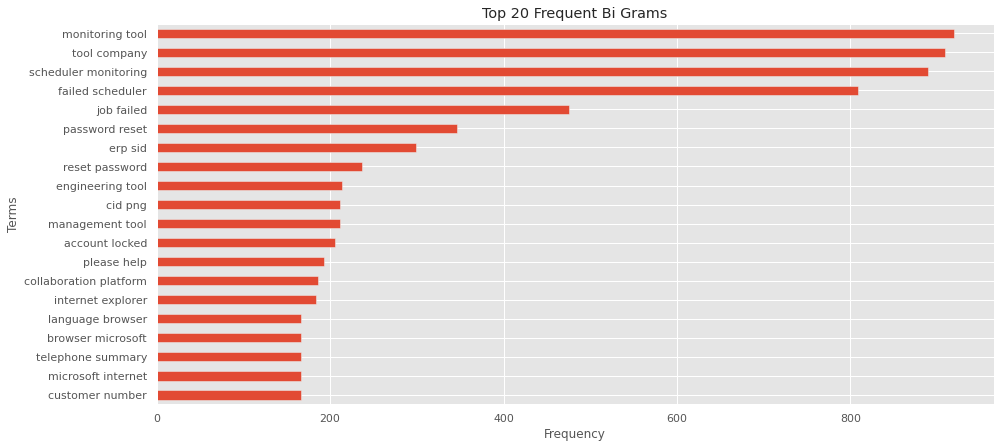

In [62]:
### Analyzing top 20 frequent BI Gram words
plt.figure(figsize = (15,7))
plt.style.use("ggplot")
plt.xlabel("Frequency",)
plt.ylabel("Terms")
top20_bigrams = bi_grams_df["frequency"].sort_values(ascending = False).head(20)

top20_bigrams.head(20).sort_values(ascending = True).plot(kind="barh",title = "Top 20 Frequent Bi Grams")


Creating Document Term Matrix

In [63]:
df_grouped=df[['Assignment group','final_description']].groupby(by='Assignment group').agg(lambda x:' '.join(x))
df_grouped.head()

,final_description
Assignment group,
GRP_0,login issue verified user detail employee mana...
GRP_1,event critical hostname company value mountpoi...
GRP_10,job hr payroll na failed scheduler monitoring ...
GRP_11,engineering tool drawing original pdf format s...
GRP_12,c label sys server space consumed available g ...


In [64]:
# Creating Document Term Matrix
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(analyzer='word')
data=cv.fit_transform(df_grouped['final_description'])
df_dtm = pd.DataFrame(data.toarray(), columns=cv.get_feature_names())
df_dtm.index=df_grouped.index
df_dtm.head(3)

,aa,aacount,aao,ab,abandon,abap,abarbeiten,abc,abca,abcdegy,abcdri,abd,abdhtyu,abend,abended,abeoucfj,aber,abertura,abfragetimeout,abgebildet,abgebrochen,abgelaufen,abgeschlossen,abgesprochen,abgrtyreu,abhanden,abhandengekommen,abhay,abhilfe,abholen,abholung,ability,abl,able,abmelden,abode,abort,aborted,aborting,abovementioned,...,zuothryrt,zupifghd,zur,zurtxjbd,zurzeit,zusammen,zuschaltung,zuspjbtw,zust,zuteillisten,zuvjqgwa,zuvor,zuwhpqrc,zuwnxdbt,zuxcfonv,zuyimtsf,zvjwleuo,zvjxuahe,zvmesjpt,zvnxlobq,zvygmnco,zw,zwar,zwei,zweites,zwip,zwirhcol,zwischen,zwrypjqv,zwutmehy,zwwirep,zxdtskpw,zxobmreq,zxvjsipd,zyewibop,zyjfpgtk,zyrnqiav,zywoxerf,zz,zzcmpgn
Assignment group,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GRP_0,0,0,0,1,0,2,0,1,0,0,1,1,2,0,0,1,7,0,0,0,1,0,1,0,1,1,0,0,2,0,0,1,1,260,0,0,0,0,0,0,...,1,0,9,0,1,4,1,2,0,1,0,0,3,0,7,0,0,0,0,1,1,0,1,1,0,0,3,1,0,0,0,1,4,1,0,0,1,5,1,0
GRP_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
GRP_10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [65]:
pip install wordcloud

In [66]:
df.head()

,Short description,Description,Assignment group,nwords_short_description,nwords_description,final_description
0,login issue,verified user detail employee manager name che...,GRP_0,2,29,login issue verified user detail employee mana...
1,outlook,hmjdrvpb komuaywn team meeting skype meeting e...,GRP_0,1,23,outlook hmjdrvpb komuaywn team meeting skype e...
2,cant log vpn,eylqgodm ybqkwiam cannot log vpn best,GRP_0,5,9,cant log vpn eylqgodm ybqkwiam cannot best
3,unable access hr tool page,unable access hr tool page,GRP_0,5,5,unable access hr tool page
4,skype error,skype error,GRP_0,3,3,skype error


let’s start by looking at the common words present in the description in each Group.

In [67]:
# Importing wordcloud for plotting word clouds and textwrap for wrapping longer text
from wordcloud import WordCloud
from textwrap import wrap

# Function for generating word clouds
def generate_wordcloud(data,title):
  wordcloud = WordCloud().generate(text)
  wordcloud = WordCloud(width=1200, height=600,colormap="Dark2",max_font_size=500, max_words=150, background_color="black").generate(text)
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.title('\n'.join(wrap(title,60)),fontsize=13)
  plt.show()

# Transposing document term matrix
df_dtm=df_dtm.transpose()

# Plotting word cloud for each product
for i in df['Assignment group'].unique():
  title = i
  text = df['final_description'][df['Assignment group'] == i].to_string()
  generate_wordcloud(text,title)

Output hidden; open in https://colab.research.google.com to view.

In [68]:
df.head()

,Short description,Description,Assignment group,nwords_short_description,nwords_description,final_description
0,login issue,verified user detail employee manager name che...,GRP_0,2,29,login issue verified user detail employee mana...
1,outlook,hmjdrvpb komuaywn team meeting skype meeting e...,GRP_0,1,23,outlook hmjdrvpb komuaywn team meeting skype e...
2,cant log vpn,eylqgodm ybqkwiam cannot log vpn best,GRP_0,5,9,cant log vpn eylqgodm ybqkwiam cannot best
3,unable access hr tool page,unable access hr tool page,GRP_0,5,5,unable access hr tool page
4,skype error,skype error,GRP_0,3,3,skype error


In [69]:
df_model_1 = df[['final_description','Assignment group']]

In [70]:
df_model_1.head()

,final_description,Assignment group
0,login issue verified user detail employee mana...,GRP_0
1,outlook hmjdrvpb komuaywn team meeting skype e...,GRP_0
2,cant log vpn eylqgodm ybqkwiam cannot best,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


In [71]:
FinalData=(df_model_1)

In [72]:
FinalData.head()

,final_description,Assignment group
0,login issue verified user detail employee mana...,GRP_0
1,outlook hmjdrvpb komuaywn team meeting skype e...,GRP_0
2,cant log vpn eylqgodm ybqkwiam cannot best,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


In [73]:
FinalData=FinalData.groupby('Assignment group').filter(lambda x : len(x)>200).reset_index()
FinalData.drop(columns=['index'],inplace=True)

In [74]:
FinalData['Assignment group'].nunique()

7

In [75]:
FinalData.shape

(5891, 2)

In [76]:
FinalData.head()

,final_description,Assignment group
0,login issue verified user detail employee mana...,GRP_0
1,outlook hmjdrvpb komuaywn team meeting skype e...,GRP_0
2,cant log vpn eylqgodm ybqkwiam cannot best,GRP_0
3,unable access hr tool page,GRP_0
4,skype error,GRP_0


Considering the group has more than 200 occurance


In [77]:
!pip install fasttext

     |████████████████████████████████| 71kB 1.8MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp36-cp36m-linux_x86_64.whl size=3018268 sha256=1f693946da0f1ecd1f2f2525b04f5cb362da2d45fe91b6a24fa2b48e9f81f21b
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


In [78]:
Fasttext_df = FinalData.copy()

In [79]:
for i,j in enumerate(FinalData['Assignment group']):
  Fasttext_df['Assignment group'][i] = "__label__"+j

In [80]:
Fasttext_df = Fasttext_df.sample(frac = 1) 

In [81]:
Fasttext_df.reset_index(drop = True)

,final_description,Assignment group
0,abended job scheduler sid monitoring tool company,__label__GRP_8
1,window password reset,__label__GRP_0
2,inquiry etime login,__label__GRP_0
3,job bkbackup tool sql prod full failed schedul...,__label__GRP_8
4,log erp order,__label__GRP_0
...,...,...
5886,erp sid account unlock,__label__GRP_0
5887,job failed scheduler monitoring tool company,__label__GRP_8
5888,erp sid account unlock,__label__GRP_0
5889,erp sid access right npvmwszt gzcpejxv dear gl...,__label__GRP_0


In [82]:
Fasttext_df = Fasttext_df[['final_description','Assignment group']].reset_index(drop = True)

In [83]:
temp=[]
for ind in Fasttext_df.index: 
  temp.append(Fasttext_df['Assignment group'][ind]+" "+Fasttext_df['final_description'][ind])
Fasttext_df['Description']=temp

In [84]:
Fasttext_df.drop(['final_description'], axis=1, inplace=True)


In [85]:
Fasttext_df.drop(['Assignment group'], axis=1, inplace=True)


In [86]:
Fasttext_df.head()

,Description
0,__label__GRP_8 abended job scheduler sid monit...
1,__label__GRP_0 window password reset
2,__label__GRP_0 inquiry etime login
3,__label__GRP_8 job bkbackup tool sql prod full...
4,__label__GRP_0 log erp order


In [87]:
Fasttext_df.to_csv(r'/content/drive/My Drive/Fasttext.txt',index=False,sep=' ',header=False)

In [88]:
import fasttext

In [89]:
train_file = open('/content/drive/My Drive/Fasttext.txt', 'w')
for values in temp:
  train_file.write(values+"\n")
train_file.close()

In [90]:
Fastextmodel = fasttext.train_supervised(input="/content/drive/My Drive/Fasttext.txt", lr=0.1,epoch=300, wordNgrams=2, loss='ova')

In [91]:
Fastextmodel.test("/content/drive/My Drive/Fasttext.txt")


(5891, 0.9694449159735189, 0.9694449159735189)

In [92]:
Fastextmodel.predict("Reset my password")[0][0][9:]

'GRP_0'

In [93]:
FinalData['Predicted']=FinalData.final_description.map(lambda x : str(Fastextmodel.predict(x)[0][0])[9:])

In [106]:
from sklearn.metrics import classification_report
y_true = list(FinalData['Assignment group'].values)
y_pred = list(FinalData['Predicted'].values)
print(classification_report(y_true, y_pred, target_names=list(FinalData['Assignment group'].unique())))

              precision    recall  f1-score   support

       GRP_0       1.00      1.00      1.00      3976
       GRP_8       0.99      0.96      0.98       257
       GRP_9       1.00      0.98      0.99       215
      GRP_12       1.00      0.98      0.99       241
      GRP_19       1.00      1.00      1.00       289
       GRP_2       0.82      0.96      0.88       661
      GRP_24       0.82      0.46      0.59       252

    accuracy                           0.97      5891
   macro avg       0.95      0.91      0.92      5891
weighted avg       0.97      0.97      0.97      5891



In [99]:
Fastextmodel.save_model("/content/drive/My Drive/Fasttextmodel.bin")

LSTM Model

In [107]:
%tensorflow_version 2.x
import tensorflow
tensorflow.__version__

'2.3.0'

In [108]:
# Ignore the warnings
import warnings
warnings.filterwarnings("ignore")

In [109]:
LSTM_df = FinalData.copy()

In [110]:
LSTM_df['Assignment group'].unique()

array(['GRP_0', 'GRP_8', 'GRP_9', 'GRP_12', 'GRP_19', 'GRP_2', 'GRP_24'],
      dtype=object)

In [111]:
import re
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
    
vocabSize = 2000
tokenizer = Tokenizer(num_words=vocabSize, split=' ')
tokenizer.fit_on_texts(LSTM_df['final_description'].values)
X = tokenizer.texts_to_sequences(LSTM_df['final_description'].values)
X = pad_sequences(X)

In [117]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D

embed_dim = 128
lstm_out = 196

LSTMmodel = Sequential()
LSTMmodel.add(Embedding(vocabSize, embed_dim,input_length = X.shape[1]))
LSTMmodel.add(SpatialDropout1D(0.4))
LSTMmodel.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
LSTMmodel.add(Dense(7,activation='softmax'))
LSTMmodel.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(LSTMmodel.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 272, 128)          256000    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 272, 128)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 196)               254800    
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 1379      
Total params: 512,179
Trainable params: 512,179
Non-trainable params: 0
_________________________________________________________________
None


In [114]:
from sklearn.model_selection import train_test_split

Y = pd.get_dummies(LSTM_df['Assignment group']).values
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.15, random_state = 42)
print(X_train.shape,Y_train.shape)
print(X_test.shape,Y_test.shape)

(5007, 272) (5007, 7)
(884, 272) (884, 7)


In [118]:
batch_size = 32
LSTMmodel.fit(X_train, Y_train, epochs = 10, batch_size=batch_size, verbose = 2)

157/157 - 229s - loss: 0.8867 - accuracy: 0.7500
Epoch 2/10
157/157 - 228s - loss: 0.5379 - accuracy: 0.8300
Epoch 3/10
157/157 - 227s - loss: 0.4315 - accuracy: 0.8548
Epoch 4/10
157/157 - 228s - loss: 0.3677 - accuracy: 0.8700
Epoch 5/10
157/157 - 228s - loss: 0.3124 - accuracy: 0.8900
Epoch 6/10
157/157 - 227s - loss: 0.2569 - accuracy: 0.9081
Epoch 7/10
157/157 - 226s - loss: 0.2233 - accuracy: 0.9175
Epoch 8/10
157/157 - 228s - loss: 0.2053 - accuracy: 0.9287
Epoch 9/10
157/157 - 229s - loss: 0.1734 - accuracy: 0.9341
Epoch 10/10
157/157 - 228s - loss: 0.1704 - accuracy: 0.9307


In [119]:
score,acc = LSTMmodel.evaluate(X_test, Y_test, verbose = 2, batch_size = batch_size)
print("score: %.2f" % (score))
print("acc: %.2f" % (acc))

28/28 - 5s - loss: 0.4834 - accuracy: 0.8541
score: 0.48
acc: 0.85


Conclusion

1. Fasttext and LSTM Models were tried
2. Fast text provides average of accuracy 97%
3. LSTM provides accuracy of 91% for train data and 85% for Test data